In [1]:
%cd ..

/Users/Matthew/Repos/modeling


In [2]:
import utility

In [3]:
X_train, X_test, y_train, y_test = utility.load()
X_train, X_test = utility.standardize(X_train, X_test)

Loading data...
Standardizing data...


In [4]:
from sklearn.metrics import mean_absolute_error
import numpy
import sklearn.base

In [5]:
def learning_curve(model, n_samples=30, max_size=len(X_train)):
    max_size = min(len(X_train), max_size)
    sizes = []
    errors = []
    
    for i in range(1, n_samples + 1):
        frac = float(i) / float(n_samples)
        size = int(frac * max_size)
        sizes.append(size)
        X_sub = X_train[0:size]
        y_sub = y_train[0:size]

        clone = sklearn.base.clone(model)
        clone.fit(X_sub, y_sub)        
        errors.append(mean_absolute_error(y_test, clone.predict(X_test)))
    
    return numpy.array(sizes), numpy.array(errors)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
ols = LinearRegression()
ols_sizes, ols_errors = learning_curve(ols)

In [8]:
from sklearn.linear_model import Ridge

In [9]:
ridge = Ridge(alpha=10.0)
ridge_sizes, ridge_errors = learning_curve(ridge)

In [10]:
from sklearn.linear_model import Lasso

In [11]:
lasso = Lasso(alpha=10.0)
lasso_sizes, lasso_errors = learning_curve(lasso)

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
dtree = DecisionTreeRegressor(max_leaf_nodes=10)
dtree_sizes, dtree_errors = learning_curve(dtree)

In [14]:
from sklearn.neural_network import MLPRegressor

In [15]:
nnet_1 = MLPRegressor(hidden_layer_sizes=(100), early_stopping=True)
nnet_1_sizes, nnet_1_errors = learning_curve(nnet_1)

/usr/local/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
nnet_3 = MLPRegressor(hidden_layer_sizes=(100, 100, 100), early_stopping=True)
nnet_3_sizes, nnet_3_errors = learning_curve(nnet_3)

In [17]:
nnet_5 = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100), early_stopping=True)
nnet_5_sizes, nnet_5_errors = learning_curve(nnet_5)

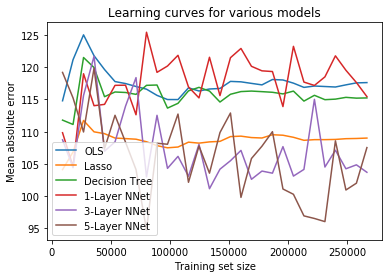

In [19]:
from matplotlib import pyplot

# We don't include the ridge curve because it's virtually identical to OLS
pyplot.clf()
pyplot.plot(ols_sizes, ols_errors, label='OLS')
pyplot.plot(lasso_sizes, lasso_errors, label='Lasso')
pyplot.plot(dtree_sizes, dtree_errors, label='Decision Tree')
pyplot.plot(nnet_1_sizes, nnet_1_errors, label='1-Layer NNet')
pyplot.plot(nnet_3_sizes, nnet_3_errors, label='3-Layer NNet')
pyplot.plot(nnet_5_sizes, nnet_5_errors, label='5-Layer NNet')

pyplot.xlabel('Training set size')
pyplot.ylabel('Mean absolute error')
pyplot.title('Learning curves for various models')
pyplot.legend()
pyplot.savefig('jupyter/learning_curves.pdf')
pyplot.show()